<a href="https://colab.research.google.com/github/cruz-marco/dex_files/blob/main/Clustering_Marco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Importando bibliotecas

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from scipy.stats import kstest

%matplotlib inline

# 1.0 Carregando dados

In [158]:
data = load_iris()

In [159]:
X = pd.DataFrame(data=data['data'], columns=['sep_len', 'sep_wid', 'pet_len', 
                                             'pet_wid'])
Y = pd.Series(data=data['target'], name='type', dtype='category')

In [160]:
"""scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(data=scaler.transform(X), columns=['sep_len', 'sep_wid', 
                                                    'pet_len', 'pet_wid'])"""

"scaler = StandardScaler()\nscaler.fit(X)\nX = pd.DataFrame(data=scaler.transform(X), columns=['sep_len', 'sep_wid', \n                                                    'pet_len', 'pet_wid'])"

In [161]:
df = pd.concat([X,Y], axis=1)

In [162]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,sep_len,sep_wid,pet_len,pet_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
1%,4.400000,2.200000,1.149000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
90%,6.900000,3.610000,5.800000,2.200000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sep_len  150 non-null    float64 
 1   sep_wid  150 non-null    float64 
 2   pet_len  150 non-null    float64 
 3   pet_wid  150 non-null    float64 
 4   type     150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [164]:
df['type'].value_counts()

0    50
1    50
2    50
Name: type, dtype: int64

# 2.0 Análise Exploratória de Dados

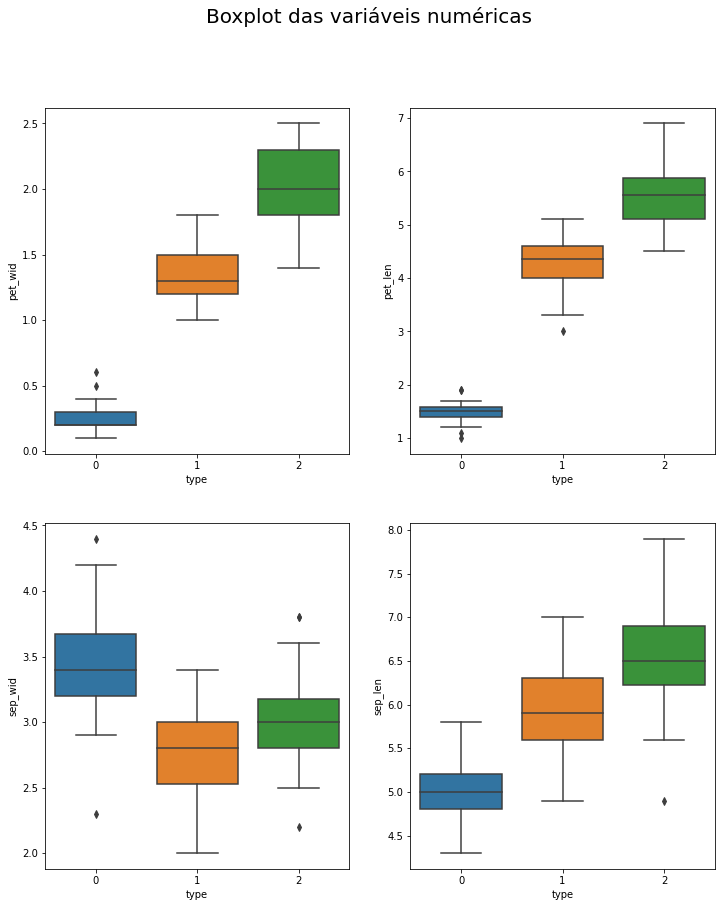

In [165]:
nv_index = len(X.columns) - 1 

ncols = 2
nrows = int(np.ceil(len(X.columns)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 14))

fig.suptitle('Boxplot das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado
            
            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            sns.boxplot(data=df, x=Y, y=X.columns[nv_index], ax= axes[linha, coluna])
            
            nv_index -= 1
        else:
            plt.axis('off')

plt.show()

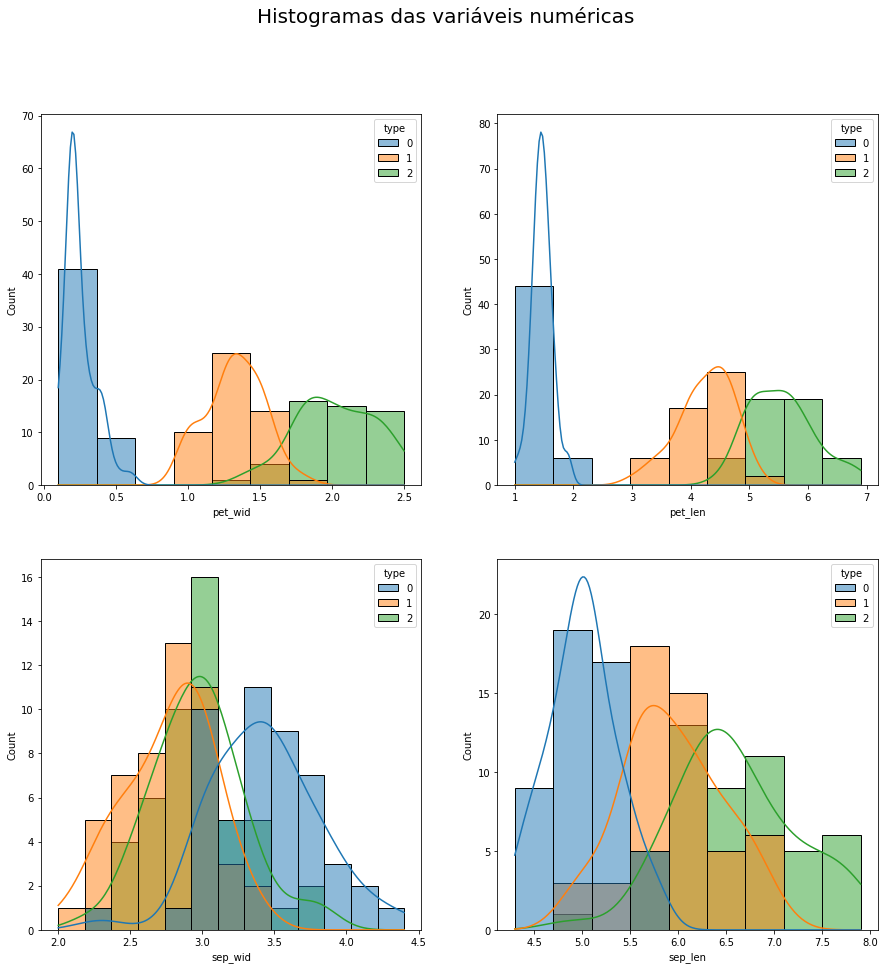

In [166]:
nv_index = len(X.columns) - 1 

ncols = 2
nrows = int(np.ceil(len(X.columns)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

fig.suptitle('Histogramas das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            sns.histplot(data=df, x=X.columns[nv_index], hue='type', kde=True 
                         , ax=axes[linha, coluna])
      
            nv_index -= 1

        else:
            plt.axis('off')


plt.show()

In [167]:
nrm_test = list()

for var in X.columns:
    ks, pvalue = kstest(df[var], cdf = 'norm')
    nrm_test.append({
        'Variavel': var,
        'Estatistica KS': ks,
        'p-valor': pvalue
    })
    
print(*sorted(nrm_test, key=lambda x: x['Estatistica KS']), sep='\n')

{'Variavel': 'pet_wid', 'Estatistica KS': 0.5459263761057697, 'p-valor': 1.8764992713715694e-42}
{'Variavel': 'pet_len', 'Estatistica KS': 0.8765328487477231, 'p-valor': 1.4044248603466367e-136}
{'Variavel': 'sep_wid', 'Estatistica KS': 0.9794298858198347, 'p-valor': 1.9343513094431768e-253}
{'Variavel': 'sep_len', 'Estatistica KS': 0.999991460094529, 'p-valor': 0.0}


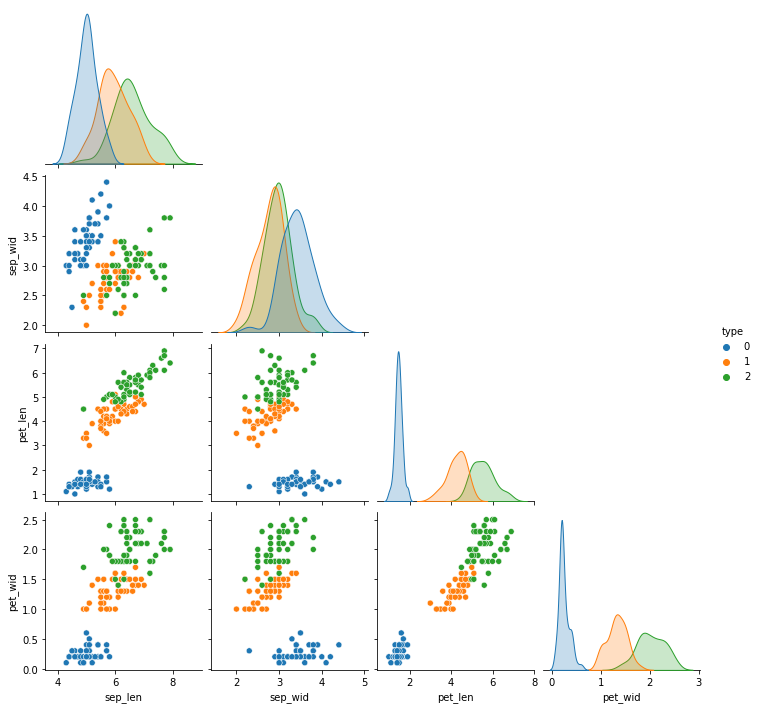

In [168]:
sns.pairplot(df, hue='type', corner=True)

# 3.0 KMeans

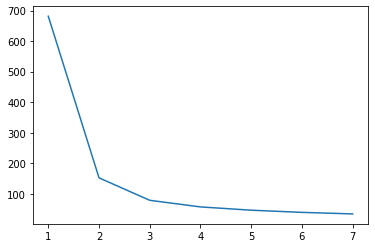

In [169]:
inertia_list = list()
for n_clust in range(1, 8):
  km_model = KMeans(n_clusters=n_clust)
  km_model.fit(X)
  inertia_list.append(km_model.inertia_)

sns.lineplot(x=range(1, 8), y=inertia_list)
plt.show()

In [170]:
kmc = KMeans(3)

In [171]:
kmc.fit(StandardScaler().fit_transform(X))

KMeans(n_clusters=3)

In [172]:
df['kms_cluster'] = kmc.predict(StandardScaler().fit_transform(X))

In [173]:
df['kms_cluster'] = df['kms_cluster'].astype('category')

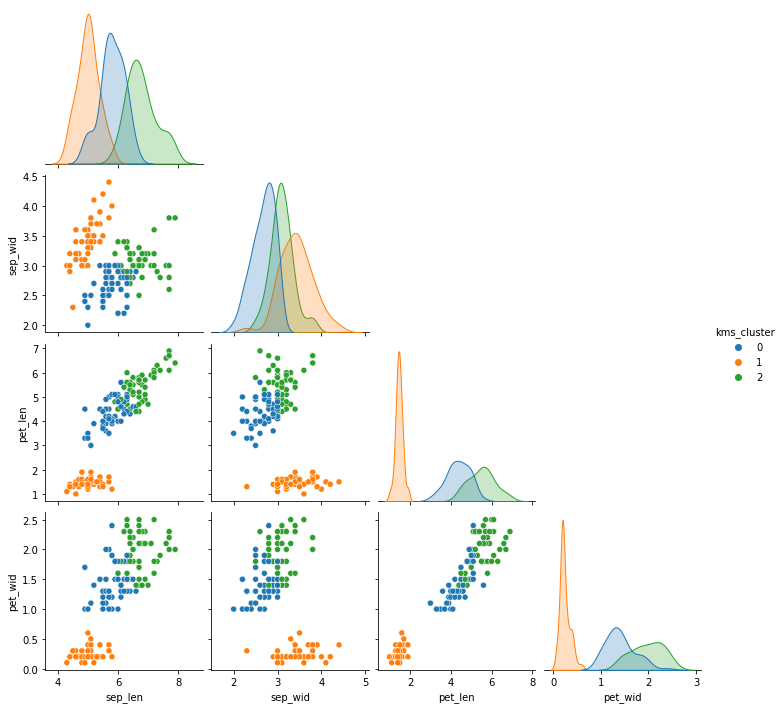

In [174]:
sns.pairplot(data=df, hue='kms_cluster', corner=True)

In [175]:
df['kms_cluster'].value_counts()

0    53
1    50
2    47
Name: kms_cluster, dtype: int64

# 4.0 DBSCAN

In [176]:
# n_neighbors = minpoints => 4 features * 2
neighbors = NearestNeighbors(n_neighbors=8)
distances, indices = neighbors.fit(X).kneighbors(X)

In [177]:
distances = np.sort(distances, axis=0)

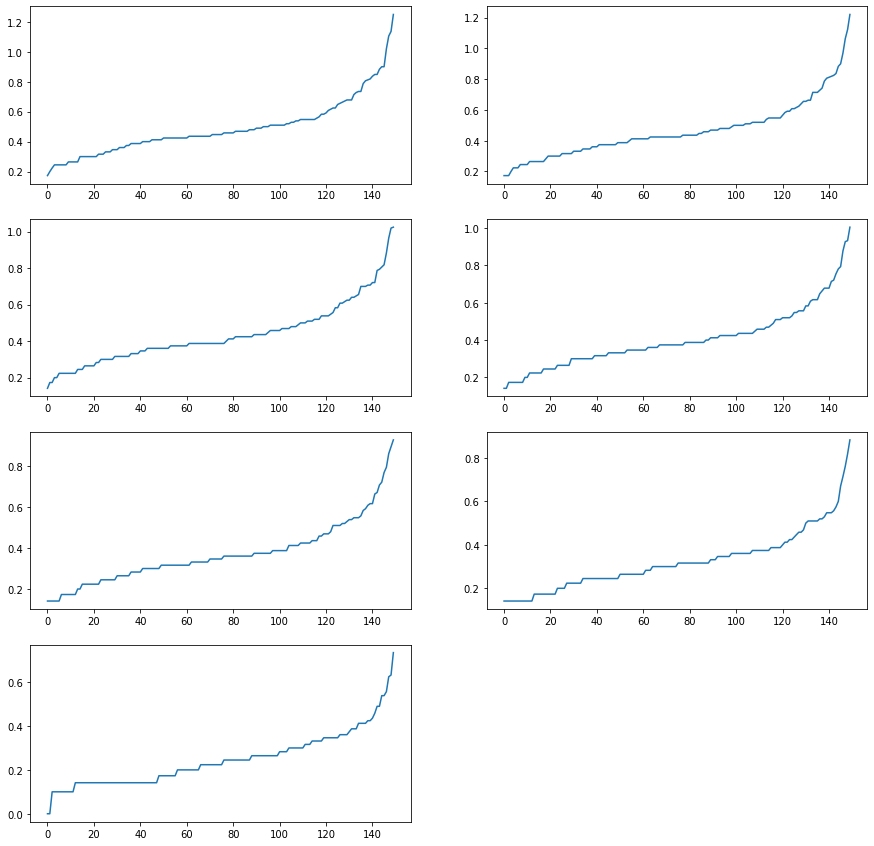

In [178]:
iter = range(1, 8)
iter_ind = len(iter)-1

ncols = 2
nrows = int(np.ceil(len(iter)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))


for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if iter_ind >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            axes[linha, coluna].plot(distances[:,iter[iter_ind]])
      
            iter_ind -= 1

        else:
            plt.axis('off')

plt.show()

In [179]:
#minpts = 8 - eps = 0.6

dbsc = DBSCAN(eps=0.6, min_samples=10)

In [180]:
df['dbs_cluster'] = dbsc.fit_predict(X)
df['dbs_cluster'] = df['dbs_cluster'].astype('category')

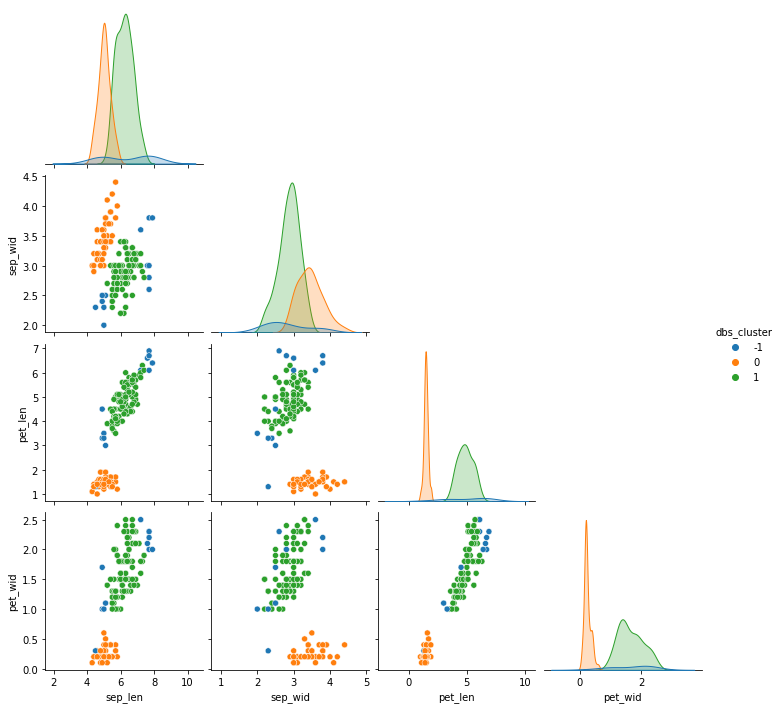

In [182]:
sns.pairplot(data=df, hue='dbs_cluster', corner=True)

In [183]:
df['dbs_cluster'].value_counts()

1     88
0     49
-1    13
Name: dbs_cluster, dtype: int64

# 5.0 Hierarquical Clustering

In [184]:
agg = AgglomerativeClustering(3, affinity='euclidean', linkage= 'ward')

In [185]:
df['hier_cluster'] = agg.fit_predict(X)

In [186]:
df['hier_cluster'] = df['hier_cluster'].astype('category')

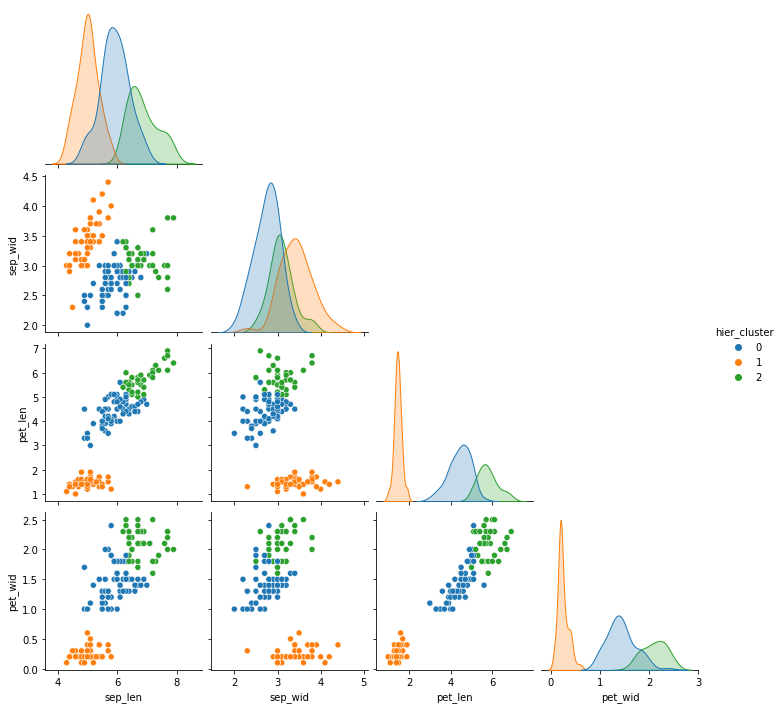

In [187]:
sns.pairplot(data=df, hue='hier_cluster', corner=True)

In [188]:
df['hier_cluster'].value_counts()

0    64
1    50
2    36
Name: hier_cluster, dtype: int64

# 6.0 Mean Shift

In [266]:
bandwidth = estimate_bandwidth(X, quantile=0.334)

In [267]:
msc = MeanShift(bandwidth=bandwidth)

In [268]:
msc.fit(StandardScaler().fit_transform(X))

MeanShift(bandwidth=1.4276629061870134)

In [269]:
df['ms_cluster'] = msc.predict(StandardScaler().fit_transform(X))

In [270]:
df['ms_cluster'] = df['ms_cluster'].astype('category')

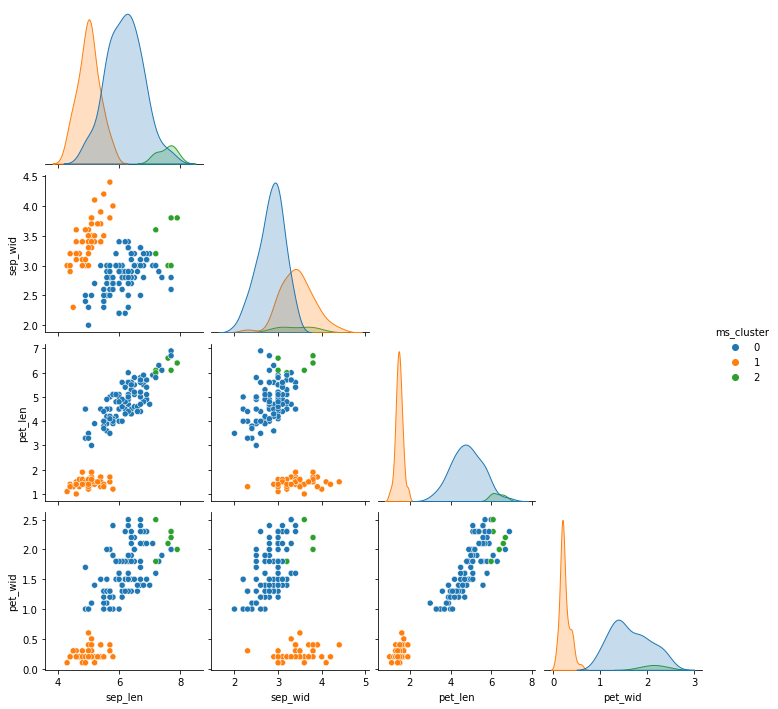

In [271]:
sns.pairplot(data=df, hue='ms_cluster', corner=True)

In [272]:
df['ms_cluster'].value_counts()

0    94
1    50
2     6
Name: ms_cluster, dtype: int64

# 7.0 Gaussian Mixture

In [275]:
components = range(1,10)

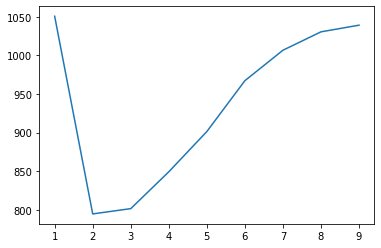

In [276]:
bics = list()
for comp in components:
  gmist = GaussianMixture(comp, random_state=42).fit(StandardScaler().fit_transform(X))
  bics.append(gmist.bic(StandardScaler().fit_transform(X)))

plt.plot(components, bics)
plt.show()

In [277]:
gmc = GaussianMixture(3)

In [278]:
gmc.fit(StandardScaler().fit_transform(X))

GaussianMixture(n_components=3)

In [279]:
df['gm_cluster'] = gmc.predict(StandardScaler().fit_transform(X))
df['gm_cluster'] = df['gm_cluster'].astype('category')

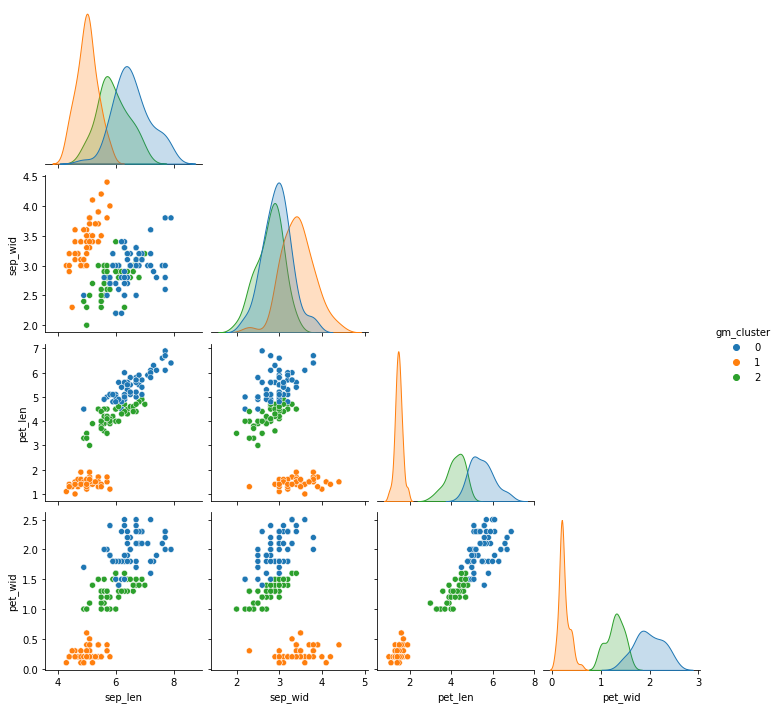

In [280]:
sns.pairplot(data=df, hue='gm_cluster', corner=True)

In [281]:
df['gm_cluster'].value_counts()

0    55
1    50
2    45
Name: gm_cluster, dtype: int64

In [284]:
df_pgm = pd.DataFrame(gmc.predict_proba(StandardScaler().fit_transform(X)))

In [292]:
pd.options.display.float_format = '{:,.7f}'.format
df_pgm

,0,1,2
0,0.0000000,1.0000000,0.0000000
1,0.0000000,1.0000000,0.0000000
2,0.0000000,1.0000000,0.0000000
3,0.0000000,1.0000000,0.0000000
4,0.0000000,1.0000000,0.0000000
...,...,...,...
145,1.0000000,0.0000000,0.0000000
146,1.0000000,0.0000000,0.0000000
147,0.9999983,0.0000000,0.0000017
148,1.0000000,0.0000000,0.0000000
